In [1]:
import cv2
from tqdm.auto import tqdm
from matplotlib import pyplot as plt
import pytesseract
import re

In [2]:
movie_id = "C1zQJVUGH0U"
video = cv2.VideoCapture(f'../video/{movie_id}.mp4')

In [3]:
video.get(cv2.CAP_PROP_FRAME_COUNT)

183986.0

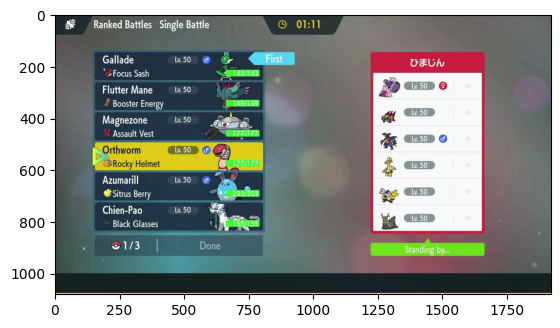

In [4]:
### %matplotlib inline
video.set(cv2.CAP_PROP_POS_FRAMES, 1652)
ret, frame = video.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)) # [500:600, 150:800]
plt.show()

# cv2.imwrite("../template_images/general_templates/select_done.png", frame[560:610, 90:503])

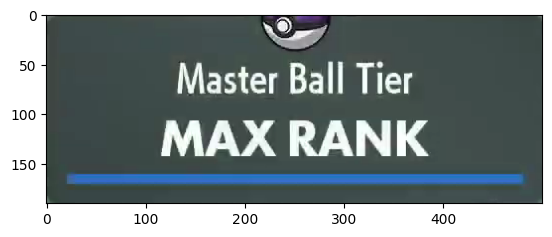

In [137]:
# 最初のランクを検知する
plt.imshow(cv2.cvtColor(frame[265:455, 1155:1655], cv2.COLOR_RGB2BGR)) # [500:600, 150:800]
plt.show()

In [138]:
gray_ranking_template = cv2.imread('../template_images/general_templates/ranking.png', 0)
gray_first_ranking_area = cv2.cvtColor(frame[265:455, 1155:1655], cv2.COLOR_RGB2GRAY)
first_ranking_result = cv2.matchTemplate(gray_ranking_template, gray_first_ranking_area, cv2.TM_CCOEFF_NORMED)
cv2.minMaxLoc(first_ranking_result)[1]

0.8007799386978149

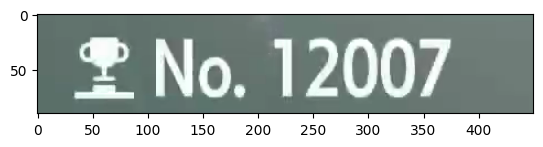

In [147]:
plt.imshow(cv2.cvtColor(frame[520:610, 1200:1650], cv2.COLOR_RGB2BGR)) # [500:600, 150:800]
plt.show()

In [103]:
gray_level_50_template = cv2.imread('../template_images/japanese_general_templates/level_50.png', 0)
gray_level_50_area = cv2.cvtColor(frame[50:90, 1560:1670], cv2.COLOR_RGB2GRAY)
level_50_result = cv2.matchTemplate(gray_level_50_area, gray_level_50_template, cv2.TM_CCOEFF_NORMED)
cv2.minMaxLoc(level_50_result)[1]

0.792877733707428

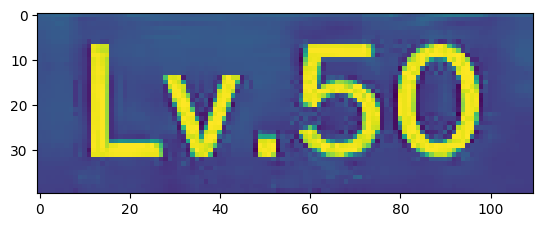

In [108]:
plt.imshow(gray_level_50_area) # [500:600, 150:800]
plt.show()

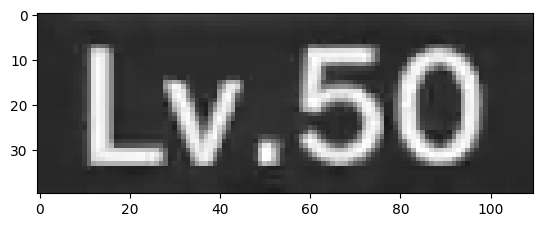

In [106]:
plt.imshow(cv2.cvtColor(gray_level_50_template, cv2.COLOR_RGB2BGR)) # [500:600, 150:800]
plt.show()

In [105]:
ret, thresh = cv2.threshold(gray_level_50_area, 200, 255, cv2.THRESH_BINARY)
max_white_pixels = 200
min_white_pixels = 60
cv2.countNonZero(thresh)

639

In [34]:
win_template = cv2.imread("../template_images/general_templates/win.png", 0)
win_or_lost = frame[950:1050, 400:750]
win_or_lost = cv2.cvtColor(win_or_lost, cv2.COLOR_BGR2GRAY)
win_res = cv2.matchTemplate(
    win_or_lost, win_template, cv2.TM_CCOEFF_NORMED
)
win_score = cv2.minMaxLoc(win_res)[1]
win_score

0.9005860686302185

In [111]:
win_template = cv2.imread("../template_images/general_templates/lost.png", 0)
win_or_lost = frame[600:700, 250:500]
win_or_lost = cv2.cvtColor(win_or_lost, cv2.COLOR_BGR2GRAY)
win_res = cv2.matchTemplate(
    win_or_lost, win_template, cv2.TM_CCOEFF_NORMED
)
win_score = cv2.minMaxLoc(win_res)[1]
win_score

0.9276083111763

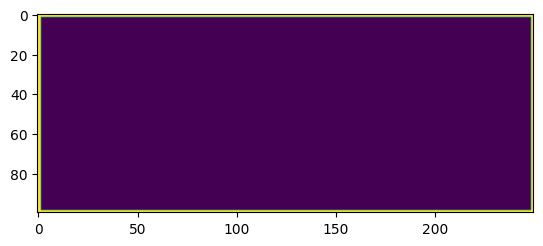

In [54]:
import pytesseract
from pytesseract import Output

message = frame[600:700, 250:500]
message = cv2.cvtColor(message, cv2.COLOR_BGR2GRAY)
threshold_value = 200
max_value = 255
_, message = cv2.threshold(message, threshold_value, max_value, cv2.THRESH_BINARY)

d = pytesseract.image_to_data(message, output_type=Output.DICT, lang="eng")
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(message, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.imshow(message)
plt.show()

In [40]:
video.set(cv2.CAP_PROP_POS_FRAMES, 88370) # 94050
ret, frame = video.read()
win_or_lost = frame[600:700, 250:500]
win_or_lost = cv2.cvtColor(win_or_lost, cv2.COLOR_BGR2GRAY)
threshold_value = 95
max_value = 255
_, win_or_lost = cv2.threshold(win_or_lost, threshold_value, max_value, cv2.THRESH_BINARY)

d = pytesseract.image_to_string(win_or_lost, lang="eng")
print(d)

# plt.imshow(win_or_lost)

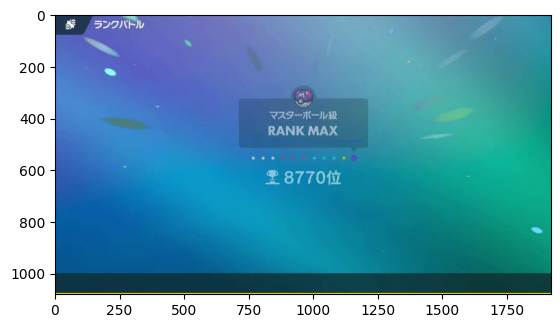

In [41]:
video.set(cv2.CAP_PROP_POS_FRAMES, 3158) # [19765, 19766, 19767, 19768, 19769, 19770]
ret, frame = video.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)) # [500:600, 150:800]
plt.show()

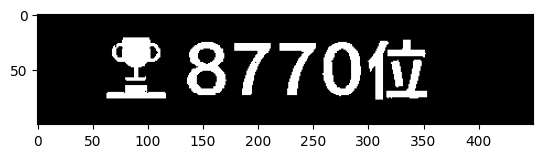

In [45]:
video.set(cv2.CAP_PROP_POS_FRAMES, 3158)
ret, frame = video.read()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
threshold_value = 160
max_value = 255
_, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thresh[580:680, 750:1200], cv2.COLOR_BGR2RGB)) # [500:600, 150:800]
plt.show()

In [48]:
_rank = pytesseract.image_to_string(thresh[580:680, 750:1200], lang="jpn", config="--psm 6")
re.sub(r"\D", "", _rank)

'8770'

In [49]:
_rank

'そそ 8770 位\n'

I/ S/W)

1/3 FIL

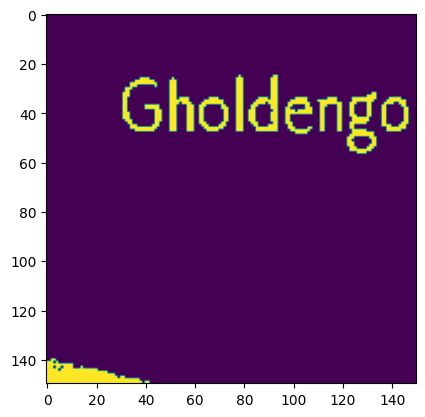

In [1425]:
# 黒いメッセージウィンドウ部分を際立たせる処理
gray = cv2.cvtColor(frame[500:650, 150:300], cv2.COLOR_BGR2GRAY)

threshold_value = 200
max_value = 255
ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)

plt.imshow(thresh)
plt.show()

In [1424]:
gray = cv2.cvtColor(frame[500:650, 150:300], cv2.COLOR_BGR2GRAY)
threshold_value = 200
max_value = 255
ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)
max_white_pixels = 5000
min_white_pixels = 500
white_pixels = cv2.countNonZero(thresh)
if white_pixels > min_white_pixels and white_pixels < max_white_pixels:
    print('メッセージが存在します')
else:
    print('メッセージは存在しません')

メッセージが存在します


In [267]:
white_pixels

524

In [1428]:
def detect_message_window(frame):
    gray = cv2.cvtColor(frame[520:550, 180:200], cv2.COLOR_BGR2GRAY)
    threshold_value = 230
    max_value = 255
    ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)
    max_white_pixels = 200
    min_white_pixels = 60
    white_pixels = cv2.countNonZero(thresh)
    print(white_pixels)
    is_message = white_pixels > min_white_pixels and white_pixels < max_white_pixels
    
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(thresh)
    is_exist_text = len(regions) >= 2
    
    return is_message & is_exist_text

In [150]:
TEMPLATE_MATCHING_THRESHOLD = 0.8

first_template = cv2.imread("../template_images/general_templates/first.png", 0)
second_template = cv2.imread("../template_images/general_templates/second.png", 0)
third_template = cv2.imread("../template_images/general_templates/third.png", 0)
select1_window = cv2.cvtColor(frame[118:150, 480:580], cv2.COLOR_RGB2GRAY)
select2_window = cv2.cvtColor(frame[192:223, 480:580], cv2.COLOR_RGB2GRAY)
select3_window = cv2.cvtColor(frame[263:295, 480:580], cv2.COLOR_RGB2GRAY)
select4_window = cv2.cvtColor(frame[335:367, 480:580], cv2.COLOR_RGB2GRAY)
select5_window = cv2.cvtColor(frame[408:440, 480:580], cv2.COLOR_RGB2GRAY)
select6_window = cv2.cvtColor(frame[480:512, 480:580], cv2.COLOR_RGB2GRAY)

pokemon_select_order_score = []
for i, template in enumerate([first_template, second_template, third_template]):
    for k, window in enumerate([select1_window, select2_window, select3_window, select4_window, select5_window, select6_window]):
        res = cv2.matchTemplate(window, template, cv2.TM_CCOEFF_NORMED)
        score = cv2.minMaxLoc(res)[1]
        if score >= TEMPLATE_MATCHING_THRESHOLD:
            pokemon_select_order_score.append([k, i, score])

pokemon_select_order = []
for i in range(3):
    pokemon_select_order.append(
        max(
            [score for score in pokemon_select_order_score if score[1] == i],
            key=lambda x: x[2],
        )[0]
    )
pokemon_select_order

[0, 4, 5]

In [33]:
res[0].description

'102341'

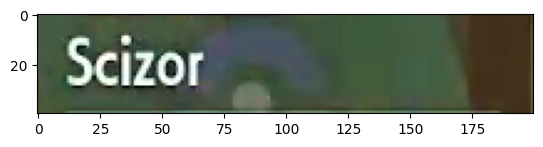

True

In [178]:
# pokemon_name
video.set(cv2.CAP_PROP_POS_FRAMES, 75300-1)
ret, frame = video.read()
plt.imshow(frame[575:615, 50:250])
plt.show()

cv2.imwrite("../template_images/labeled_pokemon_name_window_templates/ハッサム_英語.png", frame[575:615, 50:250])

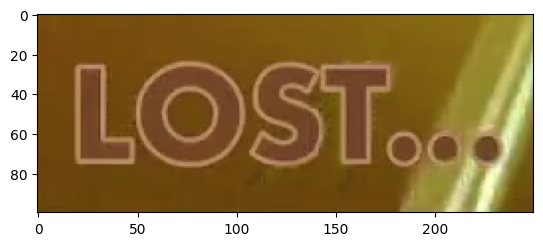

In [66]:
# win, lose を切り取る
video.set(cv2.CAP_PROP_POS_FRAMES, 16730-1)
ret, frame = video.read()
plt.imshow(frame[600:700, 250:500])
plt.show()

# cv2.imwrite("../template_images/general_templates/win.png", frame[600:700, 250:500])

In [5]:
standing_by_template = cv2.imread('../template_images/general_templates/standing_by.png')
gray_standing_by_template = cv2.cvtColor(standing_by_template, cv2.COLOR_RGB2GRAY)

level_50_template = cv2.imread('../template_images/general_templates/level_50.png')
gray_level_50_template = cv2.cvtColor(level_50_template, cv2.COLOR_RGB2GRAY)

standing_by_frames = []
level_50_frames = []
message_frames = []
for i in tqdm(range(int(video.get(cv2.CAP_PROP_FRAME_COUNT)))):
    ret, frame = video.read()
    if ret:
        # standing_by
        gray_standing_by_area = cv2.cvtColor(frame[885:935, 260:700], cv2.COLOR_RGB2GRAY)
        result = cv2.matchTemplate(gray_standing_by_area, gray_standing_by_template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        if cv2.minMaxLoc(result)[1] >= threshold:
            standing_by_frames.append(i)
        
        # level_50
        gray_level_50_area = cv2.cvtColor(frame[55:80, 980:1040], cv2.COLOR_RGB2GRAY)
        level_50_result = cv2.matchTemplate(gray_level_50_area, gray_level_50_template, cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        if cv2.minMaxLoc(level_50_result)[1] >= threshold:
            level_50_frames.append(i)
    else:
        continue

  0%|          | 0/31332 [00:00<?, ?it/s]

In [7]:
len(standing_by_frames)

1190

In [6]:
len(level_50_frames)

1803

In [8]:
len(message_frames)

0

In [9]:
# フレームを連続区間で分割する
standing_by_frame_results = []
temp = []
for i in range(len(standing_by_frames)):
    temp.append(standing_by_frames[i])
    if i < len(standing_by_frames)-1 and standing_by_frames[i+1] - standing_by_frames[i] > 100:
        standing_by_frame_results.append(temp)
        temp = []
standing_by_frame_results.append(temp)

level_50_frame_results = []
temp = []
for i in range(len(level_50_frames)):
    temp.append(level_50_frames[i])
    if i < len(level_50_frames)-1 and level_50_frames[i+1] - level_50_frames[i] > 100:
        level_50_frame_results.append(temp)
        temp = []
level_50_frame_results.append(temp)

# 前のフレームと全く同じ部分だけを取り出したい
# message_frame_results = []
# temp2 = []
# for i in range(len(message_frames)):
#     temp2.append(message_frames[i])
#     if i < len(message_frames)-1 and message_frames[i+1] - message_frames[i] > 3:
#         if len(temp2) > 1:
#             message_frame_results.append(temp2)
#         temp2 = []
# message_frame_results.append(temp2)

In [10]:
len(standing_by_frame_results)

2

In [11]:
len(level_50_frame_results)

17

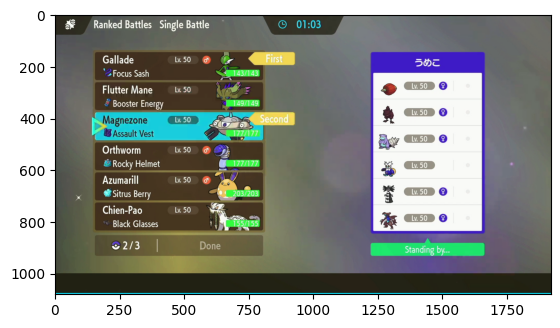

In [14]:
video.set(cv2.CAP_PROP_POS_FRAMES, standing_by_frame_results[1][-1]-1)
# video.set(cv2.CAP_PROP_POS_FRAMES, 27900-1)
ret, frame = video.read()
plt.imshow(frame)
plt.show()

In [1408]:
message_frame_results[372][-1]

76719

In [1411]:
message_frame_results[373][0]

76930

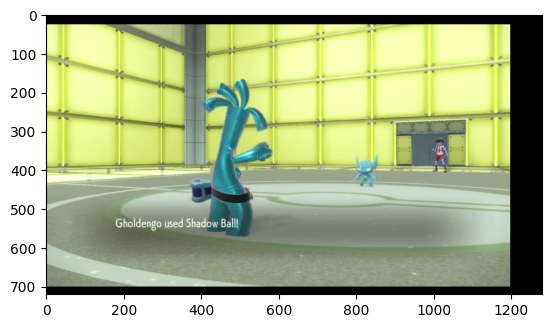

In [1422]:
## メッセージウィンドウの確認

video.set(cv2.CAP_PROP_POS_FRAMES, 76750-1)
# video.set(cv2.CAP_PROP_POS_FRAMES, 27900-1)
ret, frame = video.read()
plt.imshow(frame)
plt.show()

In [1423]:
detect_message_window(frame)

False

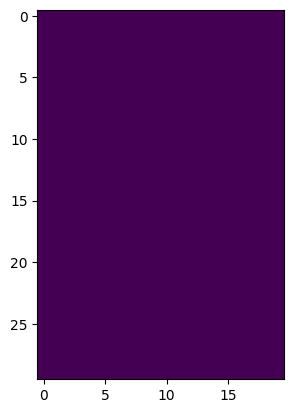

In [1412]:
video.set(cv2.CAP_PROP_POS_FRAMES, 76930-1)
ret, frame = video.read()
gray = cv2.cvtColor(frame[520:550, 180:200], cv2.COLOR_BGR2GRAY)  # 520:550, 180:200  # 500:600, 160:1050
threshold_value = 200
max_value = 255
ret, thresh = cv2.threshold(gray, threshold_value, max_value, cv2.THRESH_BINARY)
white_pixels = cv2.countNonZero(thresh)
plt.imshow(thresh)
plt.show()

In [1403]:
white_pixels

118

In [1177]:
"テツノドクガ fainted!".replace(" ", "_").replace(".", ">")

'テツノドクガ_fainted!'

In [1178]:
cv2.imwrite("../template_images/message_templates/テツノドクガ_fainted!.png", thresh)

True

In [1404]:
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(thresh)
len(regions)

4

In [27]:
# ポケモンの位置を切り取る
def get_opponent_pokemons(video, target_frame):
    video.set(cv2.CAP_PROP_POS_FRAMES, target_frame-1)
    res, frame = video.read()

    opponent_pokemon_1 = frame[170:230, 770:840]
    opponent_pokemon_2 = frame[230:295, 770:840]
    opponent_pokemon_3 = frame[295:360, 770:840]
    opponent_pokemon_4 = frame[360:425, 770:840]
    opponent_pokemon_5 = frame[425:485, 770:840]
    opponent_pokemon_6 = frame[485:550, 770:840]
    opponent_pokemons = [
        opponent_pokemon_1,
        opponent_pokemon_2,
        opponent_pokemon_3,
        opponent_pokemon_4,
        opponent_pokemon_5,
        opponent_pokemon_6
    ]
    return opponent_pokemons

def get_your_pokemons(video, target_frame):
    video.set(cv2.CAP_PROP_POS_FRAMES, target_frame-1)
    res, frame = video.read()

    your_pokemon_1 = frame[170:230, 170:240]
    your_pokemon_2 = frame[230:295, 170:240]
    your_pokemon_3 = frame[295:360, 170:240]
    your_pokemon_4 = frame[360:425, 170:240]
    your_pokemon_5 = frame[425:485, 170:240]
    your_pokemon_6 = frame[485:550, 170:240]
    your_pokemons = [
        your_pokemon_1,
        your_pokemon_2,
        your_pokemon_3,
        your_pokemon_4,
        your_pokemon_5,
        your_pokemon_6
    ]
    return your_pokemons

# ポケモンの名前を切り取る
def get_opponent_pokemon_name(video, target_frame):
    video.set(cv2.CAP_PROP_POS_FRAMES, target_frame-1)
    res, frame = video.read()

    pokemon_name_window = frame[80:120, 950:1150]
    return pokemon_name_window

In [28]:
your_pokemons_list = []
opponent_pokemons_list = []
for i, frames in enumerate(standing_by_frame_results):
    target_frame = frames[-10]
    opponent_pokemons = get_opponent_pokemons(video, target_frame)
    opponent_pokemons_list.append([cv2.cvtColor(v, cv2.COLOR_BGR2RGB) for v in opponent_pokemons])
    
    your_pokemons = get_your_pokemons(video, target_frame)
    your_pokemons_list.append([cv2.cvtColor(v, cv2.COLOR_BGR2RGB) for v in your_pokemons])
#     for k, op in enumerate(opponent_pokemons):
#         # 検出したポケモンたちを保存する
#         cv2.imwrite(f"pokemon_templates/{movie_id}_{i}_{k}.png", op)

In [129]:
for i, frames in enumerate(level_50_frame_results):
    target_frame = frames[-10]
    opponent_pokemon_name_window = get_opponent_pokemon_name(video, target_frame)
    cv2.imwrite(f"pokemon_name_window_templates/{movie_id}_{i}.png", opponent_pokemon_name_window)

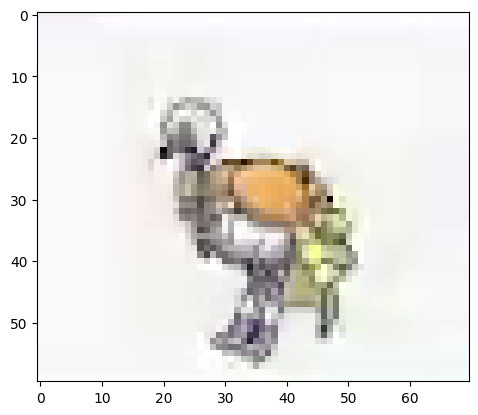

In [32]:
plt.imshow(opponent_pokemons_list[0][0])
plt.show()

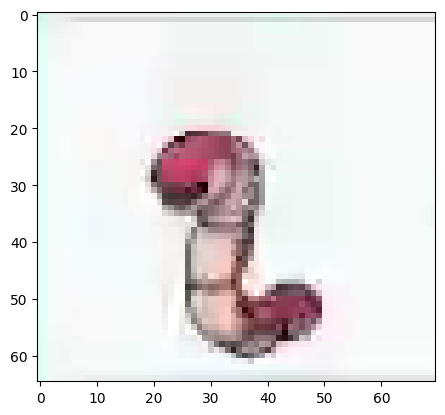

In [34]:
plt.imshow(your_pokemons_list[0][1])
plt.show()

In [25]:
import faiss
import cloudpickle
import imgsim

vtr = imgsim.Vectorizer()
trained_faiss_index = faiss.read_index(
    "../model/pokemon_image_faiss/pokemon_faiss_index"
)
trained_vector_index = cloudpickle.load(
    open("../model/pokemon_image_faiss/pokemon_faiss_index_vector_index", "rb")
)

/Users/yusuke-fukasawa/Library/Caches/pypoetry/virtualenvs/poke-battle-logger-xYV7PrtE-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/yusuke-fukasawa/Library/Caches/pypoetry/virtualenvs/poke-battle-logger-xYV7PrtE-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [26]:
img = opponent_pokemons_list[0]
vec = vtr.vectorize(img)
vec = np.reshape(vec, (1, vec.shape[0]))
scores, indexes = trained_faiss_index.search(vec, 10)
for score, idx in zip(scores[0], indexes[0]):
    if score < 200:
        print(trained_vector_index[idx].split("_")[0])

クエスパトラ
クエスパトラ
ルガルガンたそがれ
サーフゴー
サーフゴー
サーフゴー
サーフゴー
サーフゴー
サーフゴー
サーフゴー


In [35]:
img = your_pokemons_list[0][1]
vec = vtr.vectorize(img)
vec = np.reshape(vec, (1, vec.shape[0]))
scores, indexes = trained_faiss_index.search(vec, 10)
for score, idx in zip(scores[0], indexes[0]):
    if score < 200:
        print(trained_vector_index[idx].split("_")[0])

ミミズズ
ミミズズ
サーフゴー
サーフゴー
サーフゴー
サケブシッポ
サーフゴー
モロバレル
チャーレム
サーフゴー


In [36]:
scores

array([[ 46.954987,  58.00573 ,  97.87958 , 104.19879 , 108.519554,
        108.778534, 122.20578 , 122.350365, 133.55634 , 133.65839 ]],
      dtype=float32)